In [1]:
import datetime as dt
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sys.executable)
print(sys.version)
print(f"Pandas {pd.__version__}")
print(f"Seaborn {sns.__version__}")

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3
Seaborn 0.11.0


In [3]:
sys.path.append(str(Path.cwd().parent / 'src'))

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

In [5]:
import src.EDA as EDA

In [6]:
df = pd.read_csv("../data/realWorldTestData.csv", 
                 low_memory=False, 
                 nrows=1000,
                 )


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   car_nr                         1000 non-null   float64
 1   ref_dt                         1000 non-null   object 
 2   target_event                   1000 non-null   object 
 3   NUM_CONSEC_SERVICES            1000 non-null   int64  
 4   SUM_INVOICE_AMOUNT_IN_SERVICE  1000 non-null   float64
 5   SUM_INVOICE_AMOUNT             1000 non-null   float64
 6   NUM_EVENTS                     1000 non-null   int64  
 7   FIRST_EVT                      1000 non-null   object 
 8   LAST_EVT                       1000 non-null   object 
 9   LAST_MILEAGE                   1000 non-null   float64
 10  MEAN_MILEAGE_PER_MNTH          1000 non-null   float64
 11  AVG_DIFF_MNTH                  1000 non-null   int64  
 12  age_mnth                       1000 non-null   in

In [8]:
EDA.display_distinct_values(df.iloc[:, :10])

,#_distinct_values
Column,
car_nr,999
ref_dt,495
target_event,2
NUM_CONSEC_SERVICES,10
SUM_INVOICE_AMOUNT_IN_SERVICE,47
SUM_INVOICE_AMOUNT,714
NUM_EVENTS,37
FIRST_EVT,727
LAST_EVT,544


In [9]:
EDA.display_value_counts_ptc(df[["CAR_BRAND_UID", "BASE_MARGIN"]], n_rows=3)

,counts,pct
VW-PW,560,56.0%
Audi,269,26.9%
SKODA,84,8.4%


,counts,pct
10.0,413,41.3%
7.0,283,28.3%
12.0,132,13.2%


In [10]:
EDA.display_tail_transposed(df.iloc[:, :10], random_state=None)

(1000, 10)


,685,317,951,179,21
car_nr,1.2e+08,1.1e+08,1.4e+08,1.4e+07,8.5e+07
ref_dt,2016-05-22 00:00:00.0000000,2015-09-11 00:00:00.0000000,2017-02-25 00:00:00.0000000,2017-03-10 00:00:00.0000000,2016-03-04 00:00:00.0000000
target_event,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
NUM_CONSEC_SERVICES,1,5,1,3,1
SUM_INVOICE_AMOUNT_IN_SERVICE,0,0,0,0,0
SUM_INVOICE_AMOUNT,0,5.5e+02,0,2.1e+03,0
NUM_EVENTS,4,22,4,28,5
FIRST_EVT,2012-10-12 00:00:00.0000000,2009-10-19 00:00:00.0000000,2013-05-28 00:00:00.0000000,2009-08-19 00:00:00.0000000,2012-02-28 00:00:00.0000000
LAST_EVT,2014-10-07 00:00:00.0000000,2015-03-31 00:00:00.0000000,2015-06-03 00:00:00.0000000,2016-12-01 00:00:00.0000000,2014-04-01 00:00:00.0000000
LAST_MILEAGE,2.5e+04,7.7e+04,1.4e+04,1.1e+05,2e+04


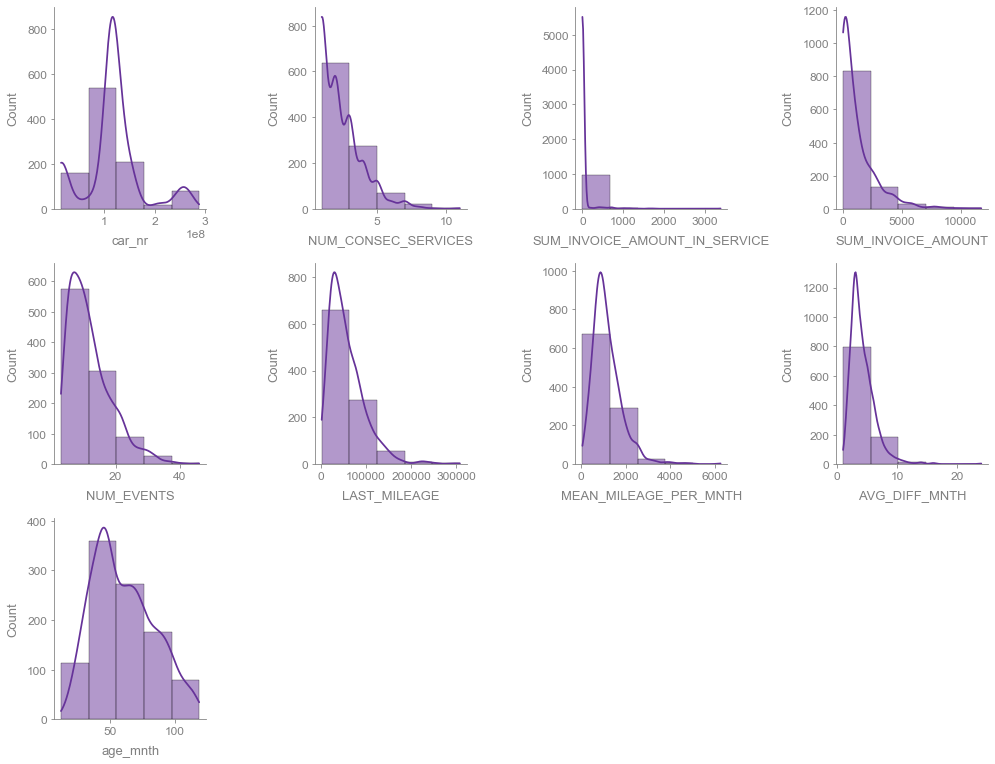

In [11]:
EDA.plot_numeric_histplots(df.iloc[:, :15], bins=5, kde=True)

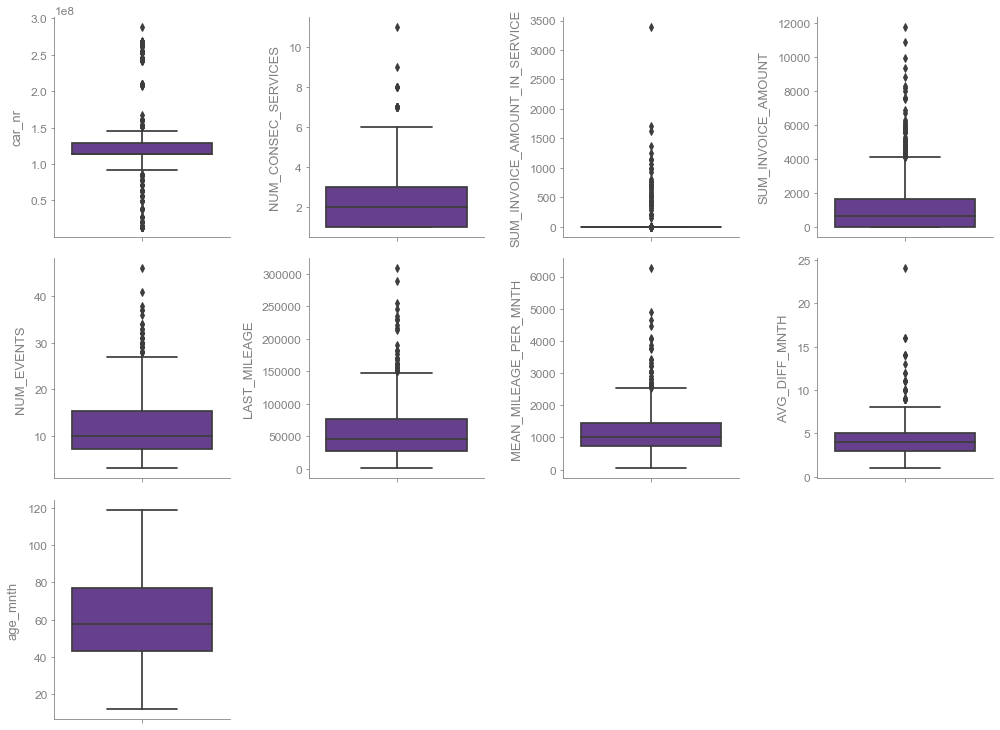

In [12]:
EDA.plot_numeric_boxplots(df.iloc[:, :15])

In [13]:
df_categorical = df.copy()
for col in ["NUM_CONSEC_SERVICES", "NUM_EVENTS", "age_mnth", "FUEL_TYPE_UID", "PARTNER_COMPANY_NR"]:
    df_categorical[col] = df_categorical[col].astype("category")

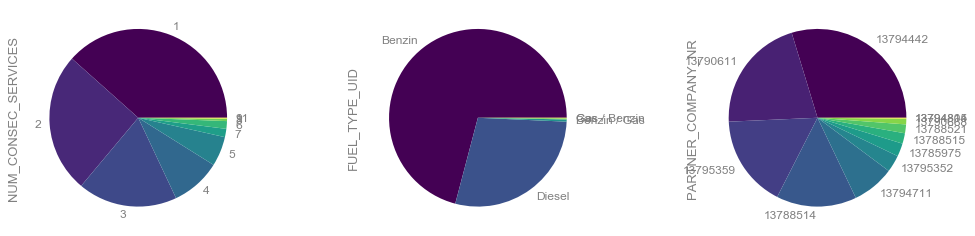

"Not plotted: ['NUM_EVENTS', 'age_mnth']"

In [14]:
EDA.plot_categorical_pies(df_categorical)

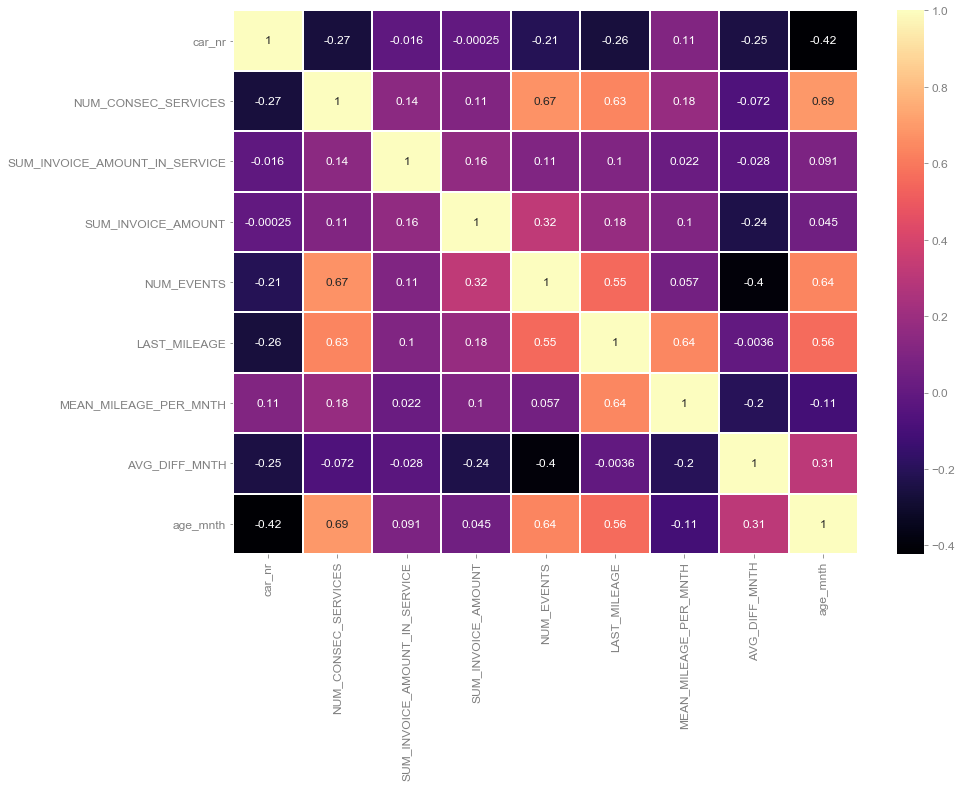

In [15]:
EDA.plot_correlations_full_heatmap(df.iloc[:, :15])

In [16]:
df_short = df.iloc[:, :15].copy()
df_short["target_num"] = np.where(df_short["target_event"] == "ACTIVE", 1, 0)

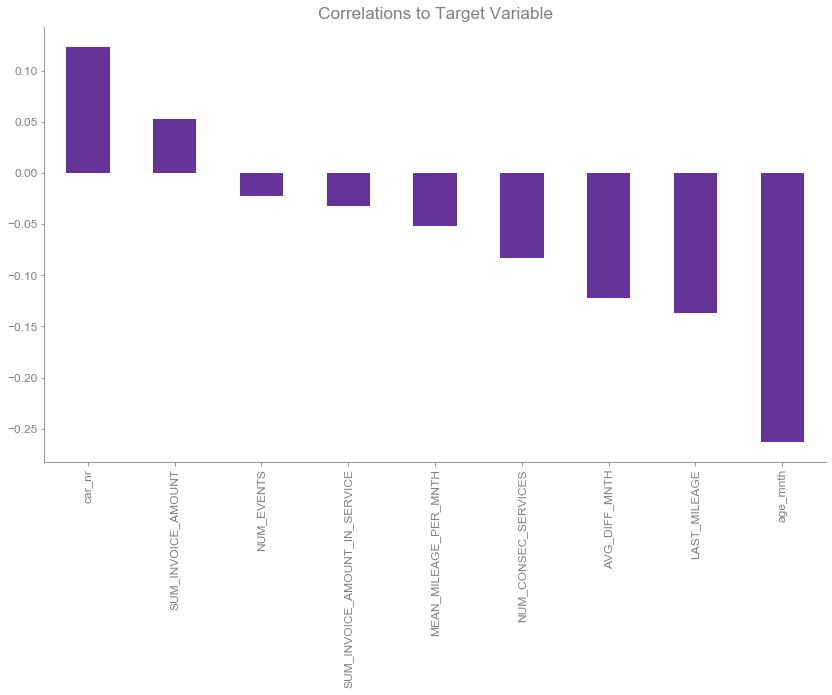

In [17]:
EDA.plot_correlations_numeric_to_target_barchart(df_short, "target_num")

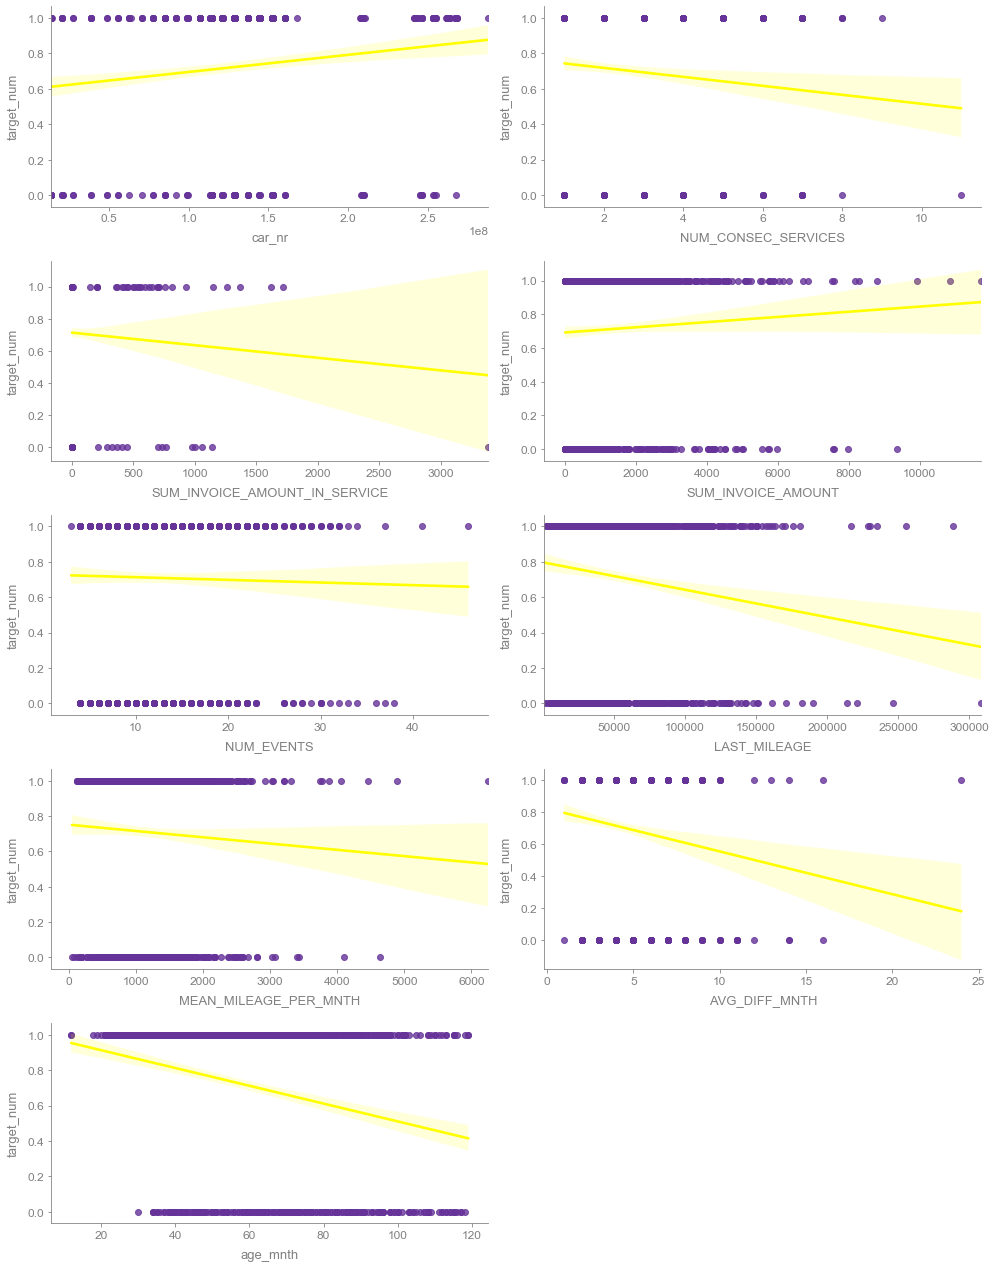

In [18]:
EDA.plot_correlations_numeric_to_target_regressions(df_short, "target_num")

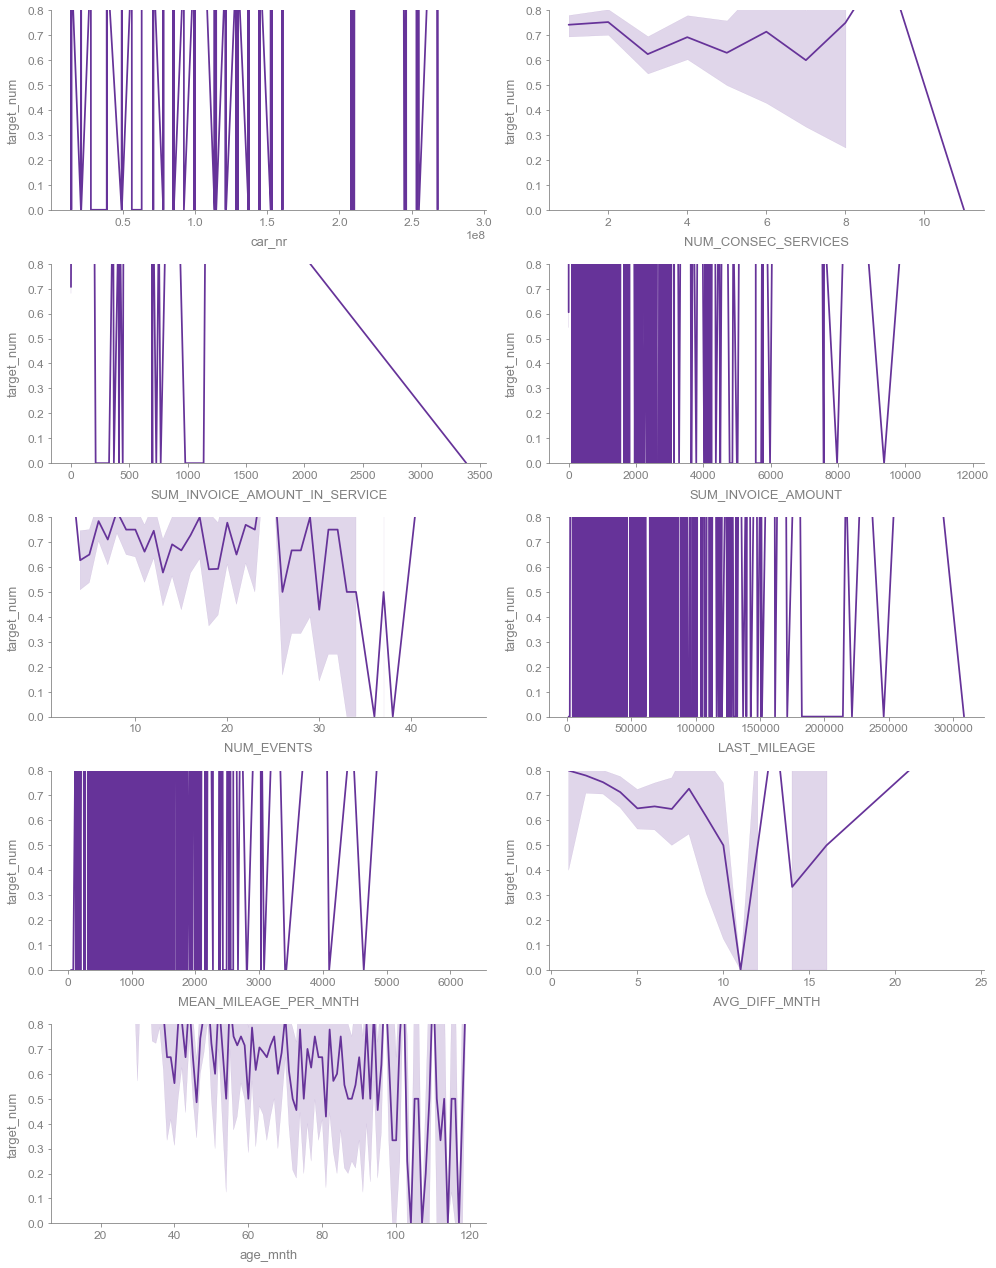

In [19]:
EDA.plot_correlations_numeric_to_target_lineplots(df_short, "target_num", ylim=(0, 0.8))

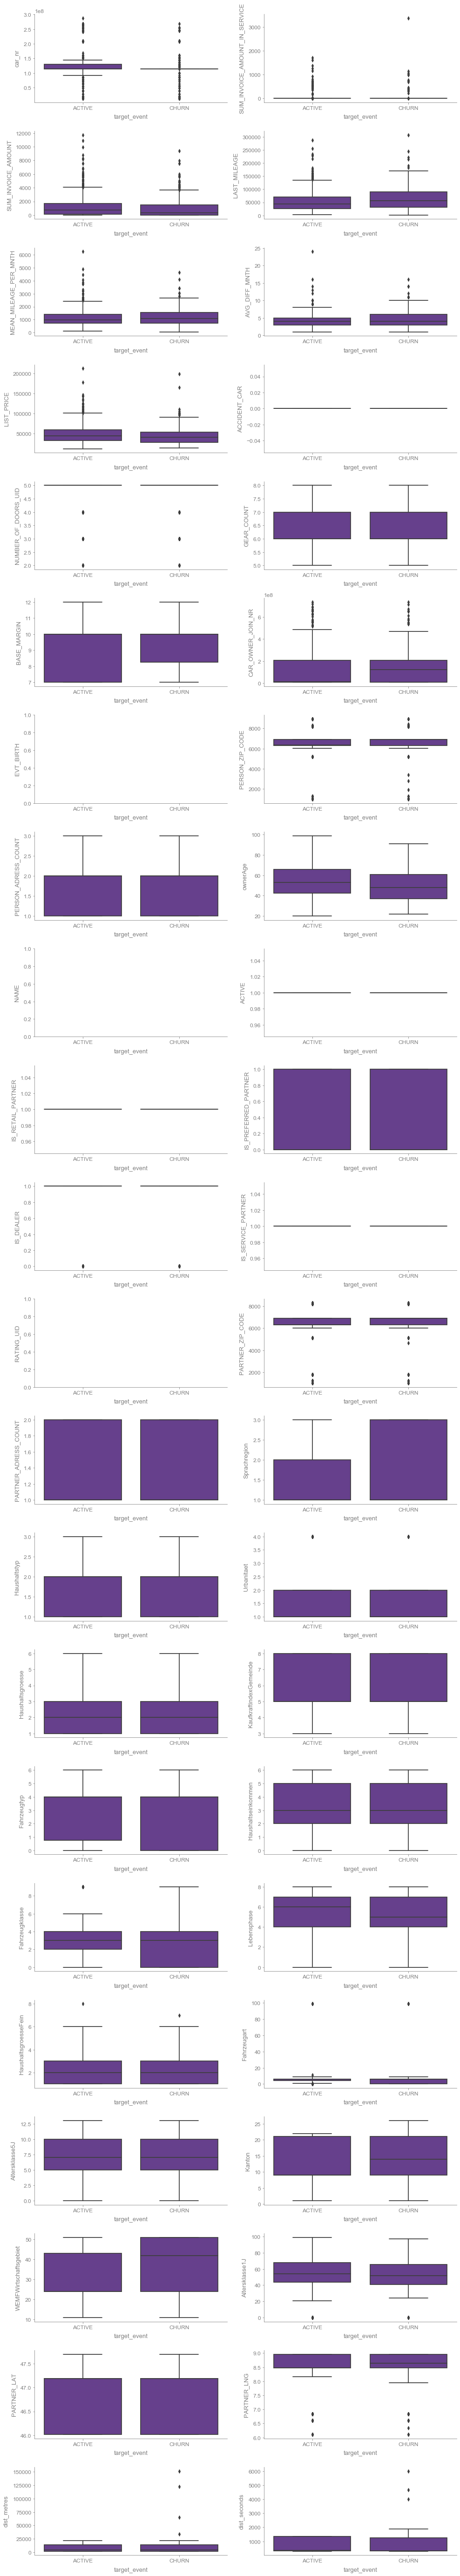

In [20]:
EDA.plot_correlations_numeric_to_target_boxplots(df_categorical, "target_event")

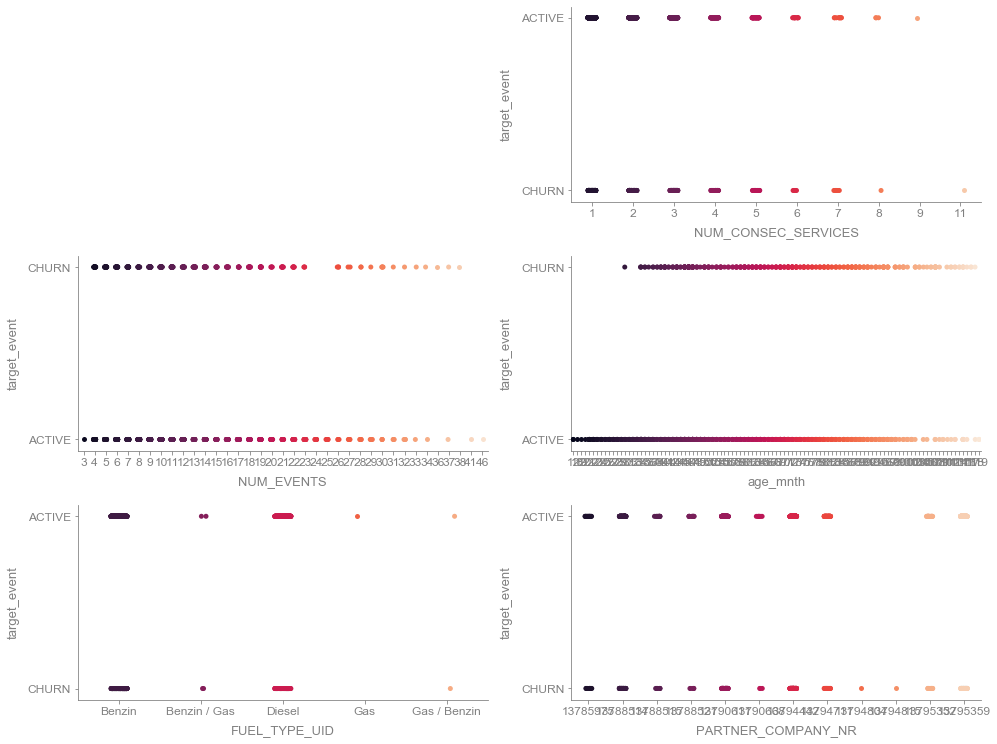

In [21]:
EDA.plot_correlations_categorical_to_target_stripplots(df_categorical, "target_event")

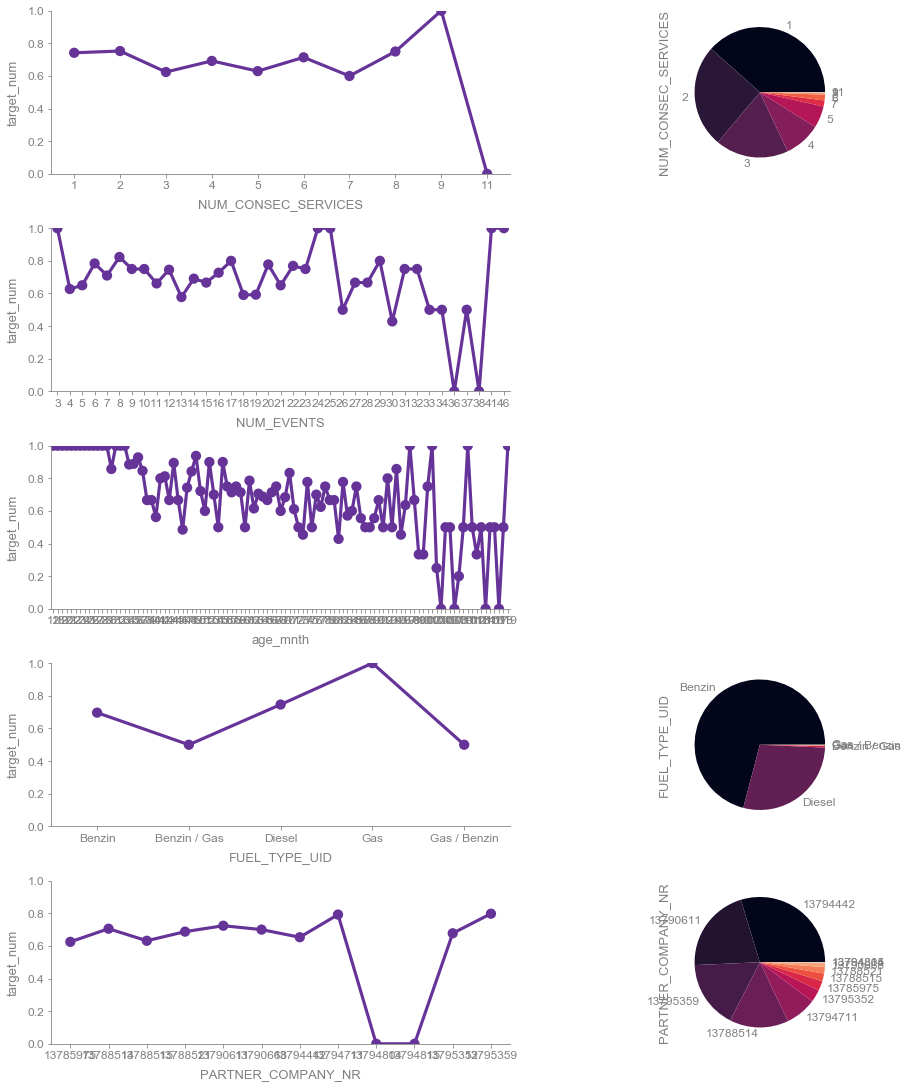

In [23]:
df_categorical["target_num"] = np.where(df_categorical["target_event"] == "ACTIVE", 1, 0)
EDA.plot_correlations_numeric_to_target_pointplots_with_pies(df_categorical, "target_num")

---